## Final Project - Intermediate Python B4
### Airbnb

In [3]:
import numpy as np
import pandas as pd

In [5]:
data=pd.read_csv("airbnb.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## 1. Get the big picture of what the data is about.
#### Data tersebut menunjukkan daftar rumah-rumah yang menjadi partner Airbnb, dan disewakan kepada para customer. Juga diberikan data berupa lokasi, harga sewa, jumlah hari minimum, jumlah review, dan availabilitynya. Dari data-data tersebut kita bisa menganalisa distribusi harga sewa di antara berbagai jenis rumah, dan memperkirakan faktor-faktor apa saja yang mempengaruhi tingkat hunian suatu jenis rumah. Dengan mengetahui insight dari data tersebut, bisa diketahui segment bisnis mana yang lebih menjanjikan.

## 2. Inspect the properties of the data in each column (type, missing value, etc)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [11]:
data.shape

(48895, 16)

## 3. Show the amount of data, mean, median, and std.


In [12]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## 4. How much is the min and max price?

Min price : 0
Max price : 10,000

## 5. Get rid of the missing value:
### a. Drop columns which has missing value that cannot be filled with any logical value (like name, host_id, etc)



In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [14]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
new_data1=data.drop(axis=1,columns=["name","host_name"])
new_data1.isna().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
new_data1.shape

(48895, 14)

### b. Fill the missing value in last_review with the most common date

In [17]:
new_data1["last_review"] = pd.to_datetime(new_data1["last_review"])

In [18]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   host_id                         48895 non-null  int64         
 2   neighbourhood_group             48895 non-null  object        
 3   neighbourhood                   48895 non-null  object        
 4   latitude                        48895 non-null  float64       
 5   longitude                       48895 non-null  float64       
 6   room_type                       48895 non-null  object        
 7   price                           48895 non-null  int64         
 8   minimum_nights                  48895 non-null  int64         
 9   number_of_reviews               48895 non-null  int64         
 10  last_review                     38843 non-null  datetime64[ns]
 11  re

In [19]:
new_data1["last_review"] = new_data1["last_review"].fillna( new_data1["last_review"].mode()[0] )

In [20]:
new_data1.isna().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### c. Fill the missing value in reviews_per_month with the mean!

In [21]:
new_data1["reviews_per_month"] = new_data1["reviews_per_month"].fillna( new_data1["reviews_per_month"].mean())

In [22]:
new_data1.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## 6. Make category based on the price: Cheap, Medium, and Expensive

#### Cheap     : <= 69   ( Q1 )
#### Medium    : between 69 - 175
#### Expensive : >= 175  ( Q3 )

In [23]:
conditions = [ new_data1['price'] >= 175, (new_data1['price'] < 175) & (new_data1['price']> 69), new_data1['price'] <= 69 ]
choices = [ "Expensive", "Medium", "Cheap" ]
new_data1["CATEGORY"] = np.select(conditions, choices)

In [24]:
new_data1

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,CATEGORY
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,Medium
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Expensive
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Medium
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Medium
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9,Medium
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36,Cheap
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27,Medium
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2,Cheap


## 7. Filter all data which has last_review in > 2019


In [25]:
new_data2 = new_data1[new_data1["last_review"].dt.strftime('%Y') == '2019']
new_data2

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,CATEGORY
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Expensive
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Medium
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Medium
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129,Expensive
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9,Medium
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36,Cheap
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27,Medium
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2,Cheap


In [26]:
new_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35261 entries, 1 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              35261 non-null  int64         
 1   host_id                         35261 non-null  int64         
 2   neighbourhood_group             35261 non-null  object        
 3   neighbourhood                   35261 non-null  object        
 4   latitude                        35261 non-null  float64       
 5   longitude                       35261 non-null  float64       
 6   room_type                       35261 non-null  object        
 7   price                           35261 non-null  int64         
 8   minimum_nights                  35261 non-null  int64         
 9   number_of_reviews               35261 non-null  int64         
 10  last_review                     35261 non-null  datetime64[ns]
 11  re

## 8. Visualize the price to compare the price of available rooms

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [28]:
new_data2.groupby("room_type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,18343.0,218.396227,275.762414,0.0,120.0,169.0,245.0,10000.0
Private room,16017.0,90.404383,139.312863,0.0,51.0,70.0,98.0,7500.0
Shared room,901.0,65.763596,79.345172,0.0,32.0,45.0,75.0,1000.0


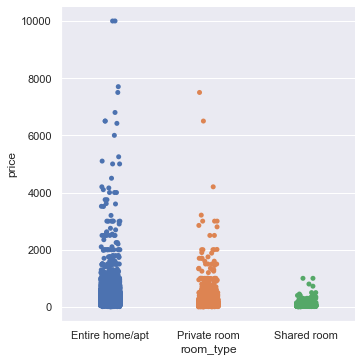

In [54]:
sns.catplot(x="room_type",y="price",data=new_data2);

### Analisa lain

#### Price comparison based on neigbourhood group & room type

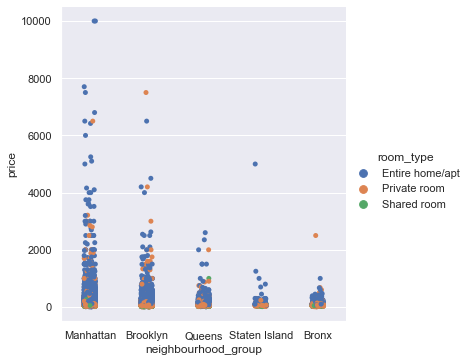

In [59]:
sns.catplot(x="neighbourhood_group",y="price",hue="room_type",data=new_data2,legend=True);

#### Minimum nights comparison based on room type

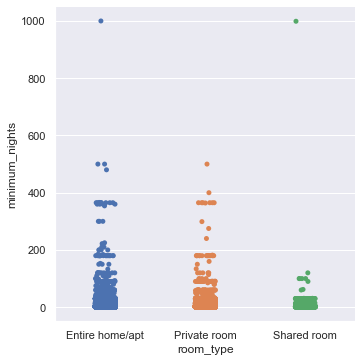

In [62]:
sns.catplot(x="room_type",y="minimum_nights",data=new_data2);

#### Minimum nights comparison based on neighbourhood group

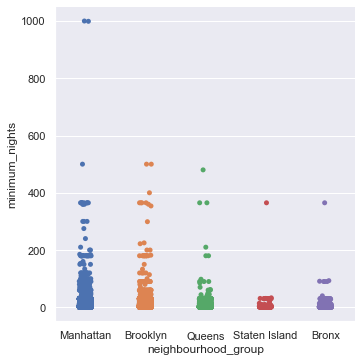

In [63]:
sns.catplot(x="neighbourhood_group",y="minimum_nights",data=new_data2);

#### Number of reviews comparison based on room type

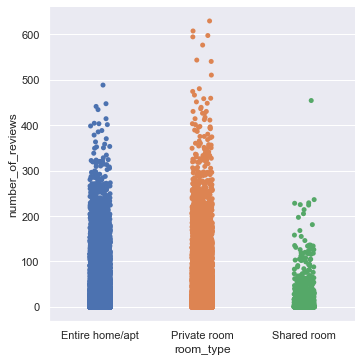

In [64]:
sns.catplot(x="room_type",y="number_of_reviews",data=new_data2);

#### Number of reviews comparison based on neigbourhood group

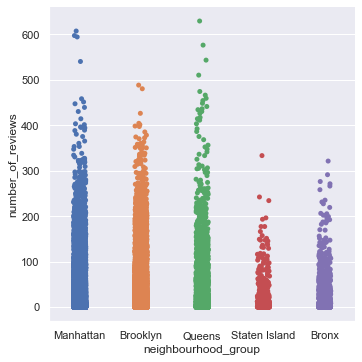

In [65]:
sns.catplot(x="neighbourhood_group",y="number_of_reviews",data=new_data2);